# **Customer Segmentation and Churn Analysis for Streaming Service Platform.**

## **Business_Understanding**

### In today’s highly competitive streaming service industry, retaining customers is essential for profitability. High customer acquisition costs make it crucial to predict customer churn and reduce attrition. Additionally, understanding customer viewership patterns allows for better segmentation, helping companies personalize services and improve retention efforts.

## **Objective:**
### **1.** **Customer Segmentation** Based on Viewership: Classify customers into segments based on viewership behavior to deliver targeted marketing, personalized content recommendations, and customized subscription plans.

### **2.** **Predict Customer Churn:** Identify customers likely to churn to proactively intervene and retain them.

## **Key Business Questions**
### **Churn Prediction:**
### * Which customers are most likely to cancel their subscription?
### * What features (e.g., MonthlyCharges, PaymentMethod, Viewership patterns) are highly predictive of churn?

### **Customer Segmentation:**
### * How do viewing habits differ among various customer segments?
### * Which segments are high-risk for churn, and which ones are loyal or highly engaged?
### * Can certain content types or subscription plans be optimized to improve retention?

## **Impact of Churn Prediction and Segmentation on the Business**
### * **Reduce Revenue Loss:** By predicting churn, the company can target high-risk customers with retention strategies such as personalized discounts or exclusive content.
### * **Improve Customer Lifetime Value (CLV):** Retaining customers increases their lifetime value, contributing to long-term profitability.
### * **Optimize Marketing and Content Strategy:** Segmentation based on viewing behavior allows for targeted content delivery and marketing campaigns, enhancing user satisfaction and engagement.
### * **Tailored Subscription Plans:** Understanding which subscription types are prone to churn helps in designing new packages or offering upsells to match customer preferences.


## **Conclusion:**
### By combining churn prediction with customer segmentation based on viewership, the company can create a data-driven retention strategy. Predicting churn enables preemptive actions, while customer segmentation offers opportunities to personalize content and enhance user experience, driving higher retention rates. This holistic approach ultimately helps the company reduce churn, improve engagement, and boost profitability.

## **Data Understanding:**

https://www.kaggle.com/datasets/safrin03/predictive-analytics-for-customer-churn-dataset/data?select=data_descriptions.csv

1. **CustomerID:** Unique identifier for each customer

2. **SubscriptionType:** Type of subscription plan chosen by the customer (e.g., Basic, Premium, Deluxe)

3. **PaymentMethod:** Method used for payment (e.g., Credit Card, Electronic Check, PayPal)

4. **PaperlessBilling:** Whether the customer uses paperless billing (Yes/No)

5. **ContentType:** Type of content accessed by the customer (e.g., Movies, TV Shows, Documentaries)

6. **MultiDeviceAccess:** Whether the customer has access on multiple devices (Yes/No)

7. **DeviceRegistered:** Device registered by the customer (e.g., Smartphone, Smart TV, Laptop)

8. **GenrePreference:** Genre preference of the customer (e.g., Action, Drama, Comedy)

9. **Gender:** Gender of the customer (Male/Female)

10. **ParentalControl:** Whether parental control is enabled (Yes/No)

11. **SubtitlesEnabled:** Whether subtitles are enabled (Yes/No)

12. **AccountAge:** Age of the customer's subscription account (in months)

13. **MonthlyCharges:** Monthly subscription charges

14. **TotalCharges:** Total charges incurred by the customer

15. **ViewingHoursPerWeek:** Average number of viewing hours per week

16. **SupportTicketsPerMonth:** Number of customer support tickets raised per month
17. **AverageViewingDuration:** Average duration of each viewing session

18. **ContentDownloadsPerMonth:** Number of content downloads per month

19. **UserRating:** Customer satisfaction rating (1 to 5)

20. **WatchlistSize:** Size of the customer's content watchlist

In [37]:
import pandas as pd
import numpy as np

#df = pd.read_excel('/content/E Commerce Dataset.xlsx')
df = pd.read_csv('/content/train.csv')
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [38]:
print(f'The total customers in the data are {df.shape[0]} and total features are {df.shape[1]}')

The total customers in the data are 243787 and total features are 21


In [39]:
df.isnull().sum()

,0
AccountAge,0
MonthlyCharges,0
TotalCharges,0
SubscriptionType,0
PaymentMethod,0
PaperlessBilling,0
ContentType,0
MultiDeviceAccess,0
DeviceRegistered,0
ViewingHoursPerWeek,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [41]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [42]:
df['Churn'].unique()

array([0, 1])

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

df_age = df[['AccountAge','ContentDownloadsPerMonth','SubscriptionType']]



df_age = df_age.groupby(['AccountAge','SubscriptionType'])['ContentDownloadsPerMonth'].mean().reset_index()
df_age.head()

,AccountAge,SubscriptionType,ContentDownloadsPerMonth
0,1,Basic,23.852239
1,1,Premium,24.460177
2,1,Standard,25.469265
3,2,Basic,24.299838
4,2,Premium,25.039334


### **Checking for Outliers**

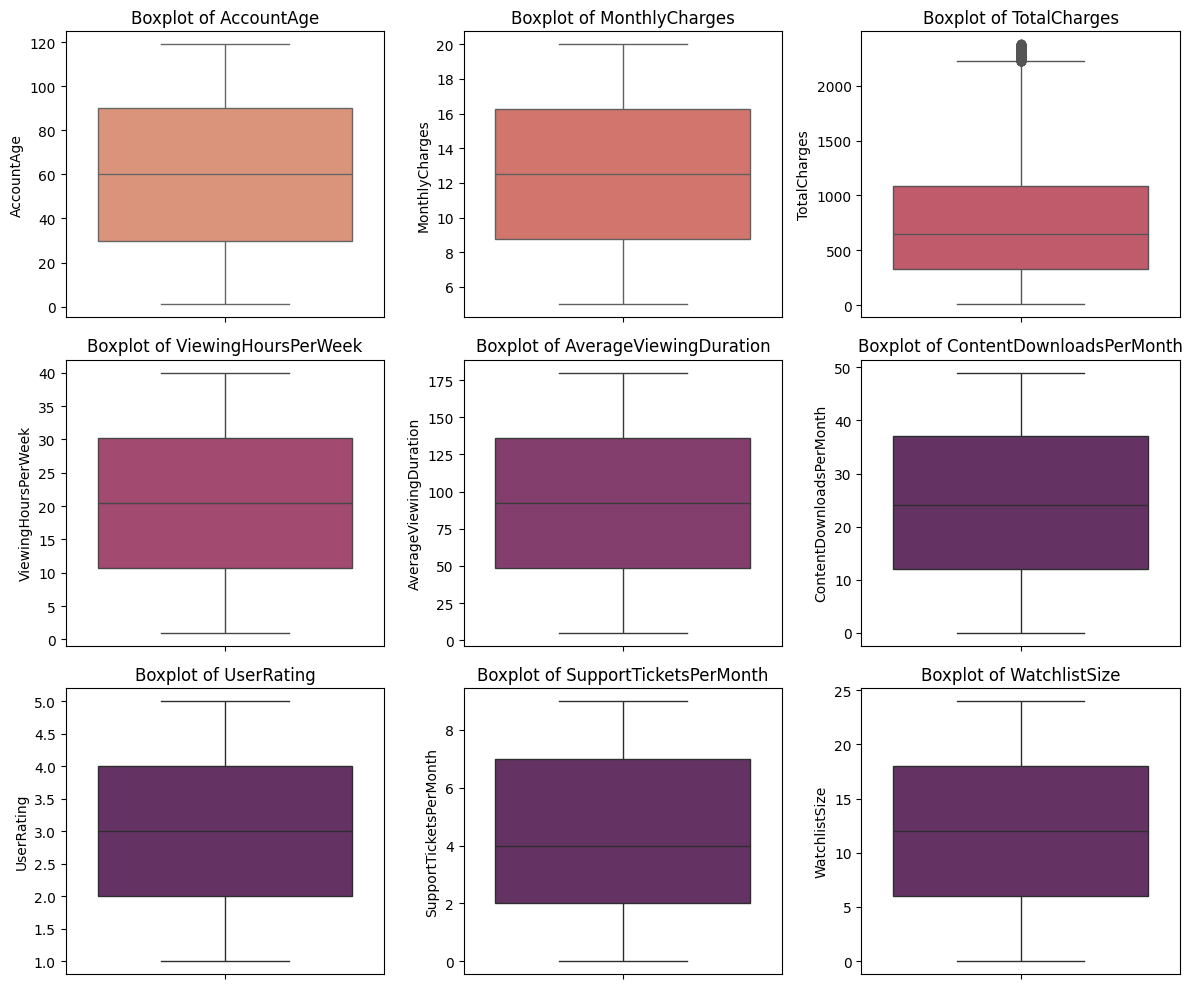

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette("flare")

fig, axes = plt.subplots(3,3,figsize=(12,10))

#Plot AccountAge
sns.boxplot(df['AccountAge'],color= color[0],ax=axes[0,0])
axes[0,0].set_title('Boxplot of AccountAge')

#Plot MonthlyCharges
sns.boxplot(df['MonthlyCharges'],color=color[1],ax=axes[0,1])
axes[0,1].set_title('Boxplot of MonthlyCharges')

#Plot TotalCharges
sns.boxplot(df['TotalCharges'],color=color[2],ax=axes[0,2])
axes[0,2].set_title('Boxplot of TotalCharges')

#Plot ViewingHoursPerWeek
sns.boxplot(df['ViewingHoursPerWeek'],color=color[3],ax=axes[1,0])
axes[1,0].set_title('Boxplot of ViewingHoursPerWeek')

#Plot AverageViewingDuration
sns.boxplot(df['AverageViewingDuration'],color=color[4],ax=axes[1,1])
axes[1,1].set_title('Boxplot of AverageViewingDuration')

#Plot ContentDownloadsPerMonth
sns.boxplot(df['ContentDownloadsPerMonth'],color=color[5],ax=axes[1,2])
axes[1,2].set_title('Boxplot of ContentDownloadsPerMonth')

#Plot UserRating
sns.boxplot(df['UserRating'],color=color[5],ax=axes[2,0])
axes[2,0].set_title('Boxplot of UserRating')

#Plot SupportTicketsPerMonth
sns.boxplot(df['SupportTicketsPerMonth'],color=color[5],ax=axes[2,1])
axes[2,1].set_title('Boxplot of SupportTicketsPerMonth')

#Plot WatchlistSize
sns.boxplot(df['WatchlistSize'],color=color[5],ax=axes[2,2])
axes[2,2].set_title('Boxplot of WatchlistSize')


#Plotting
plt.tight_layout()
plt.show()


The box plots show the distribution of various features in the dataset:

* AccountAge, ViewingHoursPerWeek, and AverageViewingDuration have a wide range with moderate spread, indicating diversity in user engagement and account age.
* MonthlyCharges and TotalCharges have some variation, with TotalCharges displaying outliers on the higher end, suggesting a few users with notably high cumulative charges.
* ContentDownloadsPerMonth, UserRating, SupportTicketsPerMonth, and WatchlistSize show relatively tight distributions with minimal outliers, indicating consistent usage patterns across these features.

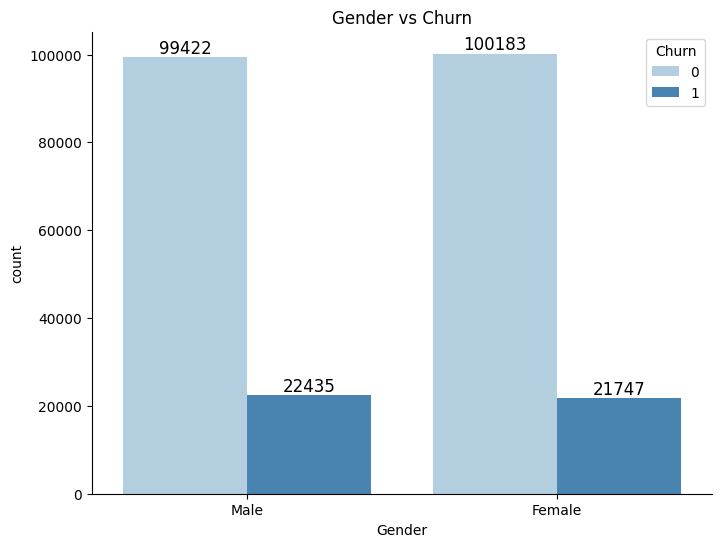

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Gender', hue='Churn',data=df, palette = 'Blues')
for containers in ax.containers:
    ax.bar_label(containers, label_type='edge', color='black',fontsize=12)
#plt.xticks(rotation=90)
plt.title('Gender vs Churn')
sns.despine(right=True)
plt.show()

* Retention rates are nearly identical across genders, with slightly more males being retained.
* Churn rates are slightly higher for males (22,435) compared to females (21,747), though the difference is minor.
* Gender does not appear to have a significant impact on churn behavior, indicating that other factors may play a more prominent role.

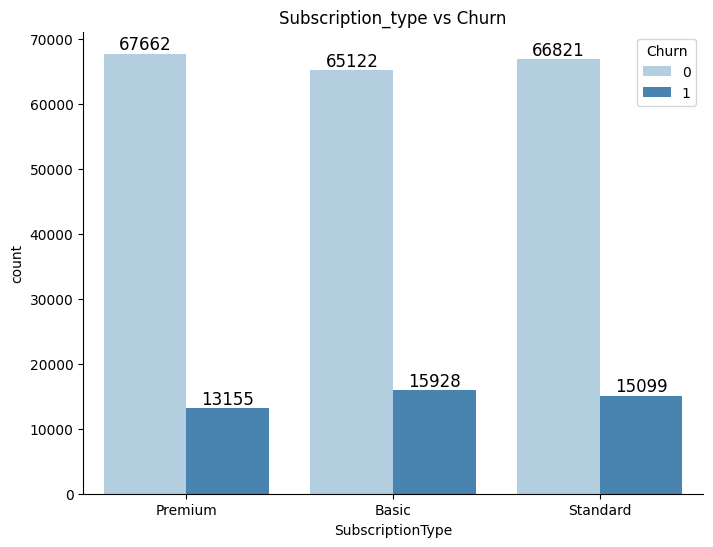

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.countplot(x='SubscriptionType', hue='Churn',data=df, palette = 'Blues')

for containers in ax.containers:
    ax.bar_label(containers, label_type='edge', color='black',fontsize=12)
#plt.xticks(rotation=90)
plt.title('Subscription_type vs Churn')

sns.despine(right=True)
plt.show()

1. **Churn Rates Across Plans:**

 * The Basic and Standard plans have slightly higher churn compared to the Premium plan, with around 15,000 customers leaving each.
 * Premium plan has the lowest churn at 13,155.

2. **Retention Trend:**

  * Retention is fairly consistent across all three subscription types, with
    each plan retaining between 65,000 to 67,000 customers.

**Insights:**

* Customers on Basic or Standard plans may be more likely to churn, possibly due to fewer features or lower satisfaction compared to the Premium plan.
* This suggests Netflix could potentially focus on upselling users from Basic/Standard to Premium to improve retention.

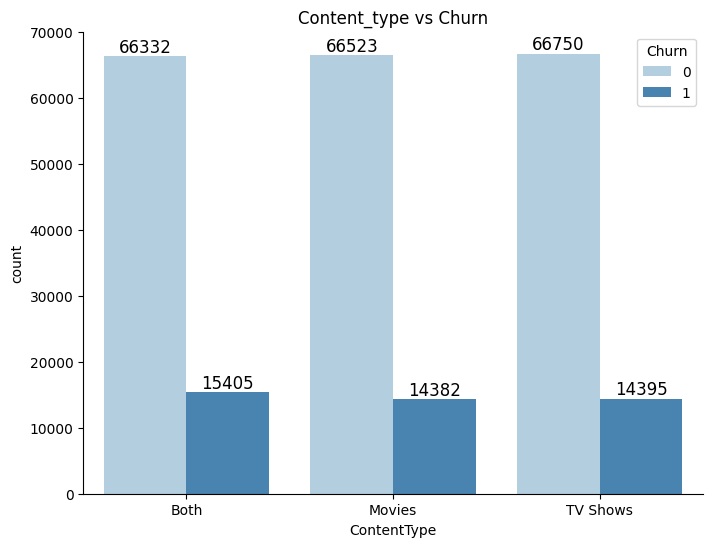

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Netflix color palette
# Create the plot
plt.figure(figsize=(8,6))
ax = sns.countplot(x='ContentType', hue='Churn', data=df, palette= 'Blues')
# Add labels to the bars
for containers in ax.containers:
    ax.bar_label(containers, label_type='edge', color='black', fontsize=12)

# Remove the top and right spines for cleaner look
sns.despine(right=True)
plt.title('Content_type vs Churn')

# Display the plot
plt.show()


* The bar chart depicts the relationship between Content Type and Churn. It shows the count of customers who accessed different types of content (Both, Movies, TV Shows) and their churn status (0 = Not Churned, 1 = Churned).
* The churn rates appear similar across all content types. However, customers accessing both types of content show a slightly higher churn count than those consuming only Movies or TV Shows, suggesting that broader content consumption alone may not be enough to prevent churn.

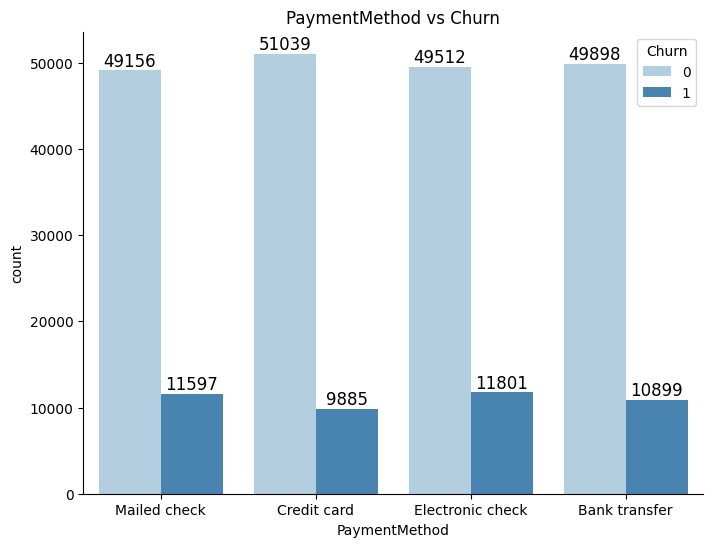

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Netflix color palette
# Create the plot
plt.figure(figsize=(8,6))
ax = sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette= 'Blues')
# Add labels to the bars
for containers in ax.containers:
    ax.bar_label(containers, label_type='edge', color='black', fontsize=12)

# Remove the top and right spines for cleaner look
sns.despine(right=True)
plt.title('PaymentMethod vs Churn')

# Display the plot
plt.show()


1. **Churn Rates by Payment Method:**

 * Highest churn is seen with Electronic check users (11,801), followed by
   Mailed check (11,597) and Bank transfer (10,899).

 * Credit card users have the lowest churn, with 9,885 customers leaving.

2. **Retention Overview:**

  * Retention is fairly consistent across all payment methods, with each method retaining between 49,156 to 51,039 customers.

**Insights:**

Customers using electronic checks show higher churn, possibly due to payment-related frustrations.
Focusing on promoting automatic payment methods like credit cards or offering incentives for switching to more seamless payment options could help reduce churn.

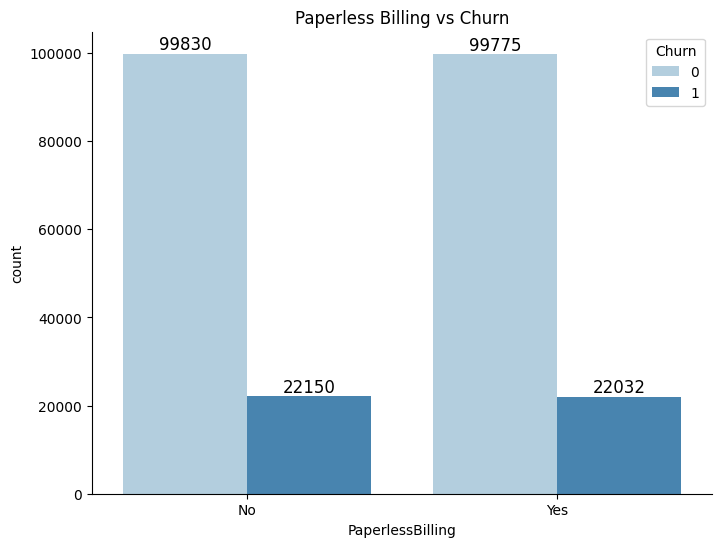

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Netflix color palette
# Create the plot
plt.figure(figsize=(8,6))
ax = sns.countplot(x='PaperlessBilling', hue='Churn', data=df, palette= 'Blues')
# Add labels to the bars
for containers in ax.containers:
    ax.bar_label(containers, label_type='edge', color='black', fontsize=12)

# Remove the top and right spines for cleaner look
sns.despine(right=True)
plt.title('Paperless Billing vs Churn')

# Display the plot
plt.show()


1. **Churn Rates by Paperless Billing:**

  * Customers with paperless billing have a churn count of 22,032.Those without paperless billing show a similar churn count of 22,150.

2. **Retention Overview:**

  * Retention is nearly identical across both groups, with around 99,775 to 99,830 customers retained.

**Insights:**
* Paperless billing does not appear to significantly impact churn rates.
Other factors, such as payment method or subscription experience, might have a stronger influence on churn.

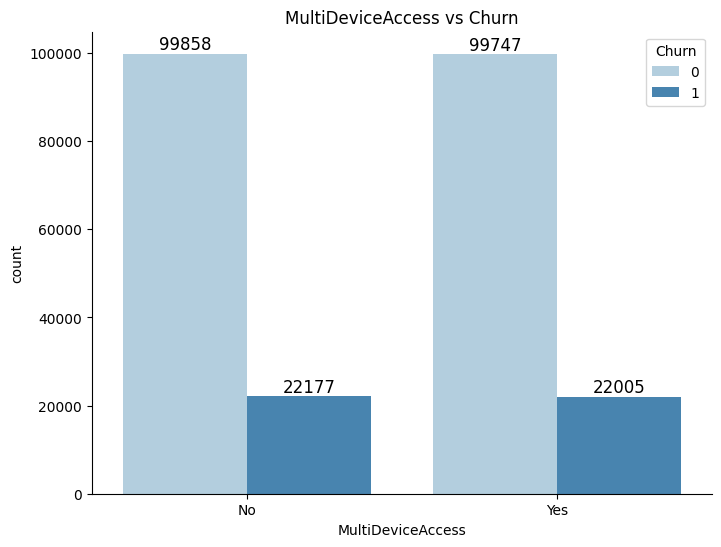

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Netflix color palette
# Create the plot
plt.figure(figsize=(8,6))
ax = sns.countplot(x='MultiDeviceAccess', hue='Churn', data=df, palette= 'Blues')
# Add labels to the bars
for containers in ax.containers:
    ax.bar_label(containers, label_type='edge', color='black', fontsize=12)

# Remove the top and right spines for cleaner look
sns.despine(right=True)
plt.title('MultiDeviceAccess vs Churn')

# Display the plot
plt.show()


1. **Churn Rates by Multi-Device Access:**

  * Customers without multi-device access have a churn count of 22,177.
  * Customers with multi-device access have a slightly lower churn count of 22,005.

2. **Retention Overview:**
  * Retention is similar across both groups, with around 99,747 to 99,858 customers retained.

**Insights:**
  * Having multi-device access does not significantly reduce churn.
Other factors, such as personalized features or better engagement strategies, might be required to improve retention

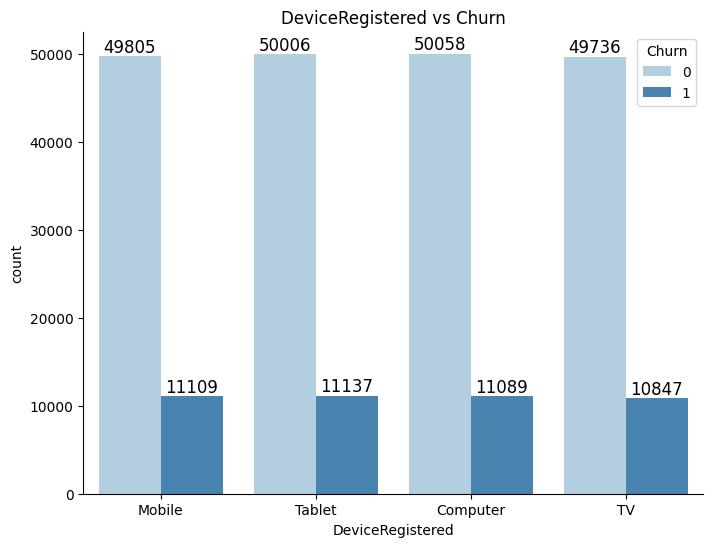

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Netflix color palette
# Create the plot
plt.figure(figsize=(8,6))
ax = sns.countplot(x='DeviceRegistered', hue='Churn', data=df, palette= 'Blues')
# Add labels to the bars
for containers in ax.containers:
    ax.bar_label(containers, label_type='edge', color='black', fontsize=12)

# Remove the top and right spines for cleaner look
sns.despine(right=True)
plt.title('DeviceRegistered vs Churn')

# Display the plot
plt.show()


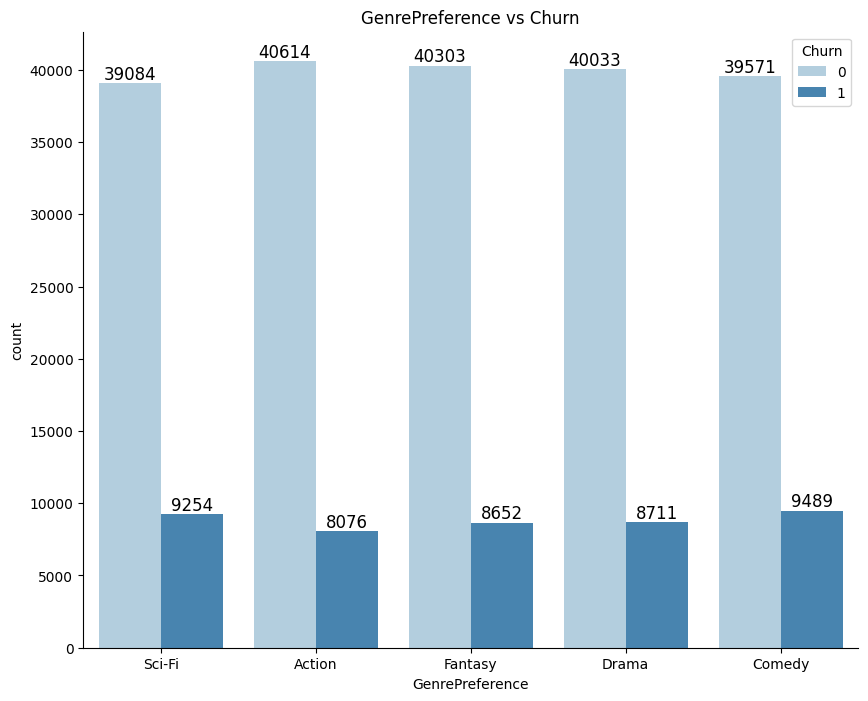

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Netflix color palette
# Create the plot
plt.figure(figsize=(10,8))
ax = sns.countplot(x='GenrePreference', hue='Churn', data=df, palette= 'Blues')
# Add labels to the bars
for containers in ax.containers:
    ax.bar_label(containers, label_type='edge', color='black', fontsize=12)

# Remove the top and right spines for cleaner look
sns.despine(right=True)
plt.title('GenrePreference vs Churn')

# Display the plot
plt.show()


1. **Churn Rates by Registered Device:**
  * Tablet users show the highest churn (11,137), followed by Mobile (11,109), Computer (11,089), and TV (10,847).

2. **Retention Overview:**
  * Retention is consistent across all devices, with around 49,000 to 50,058 customers retained for each device type.

**Insights:**

* The type of registered device has minimal impact on churn.
Efforts to improve retention may need to focus on other areas like content engagement or subscription benefits rather than device-specific strategies.

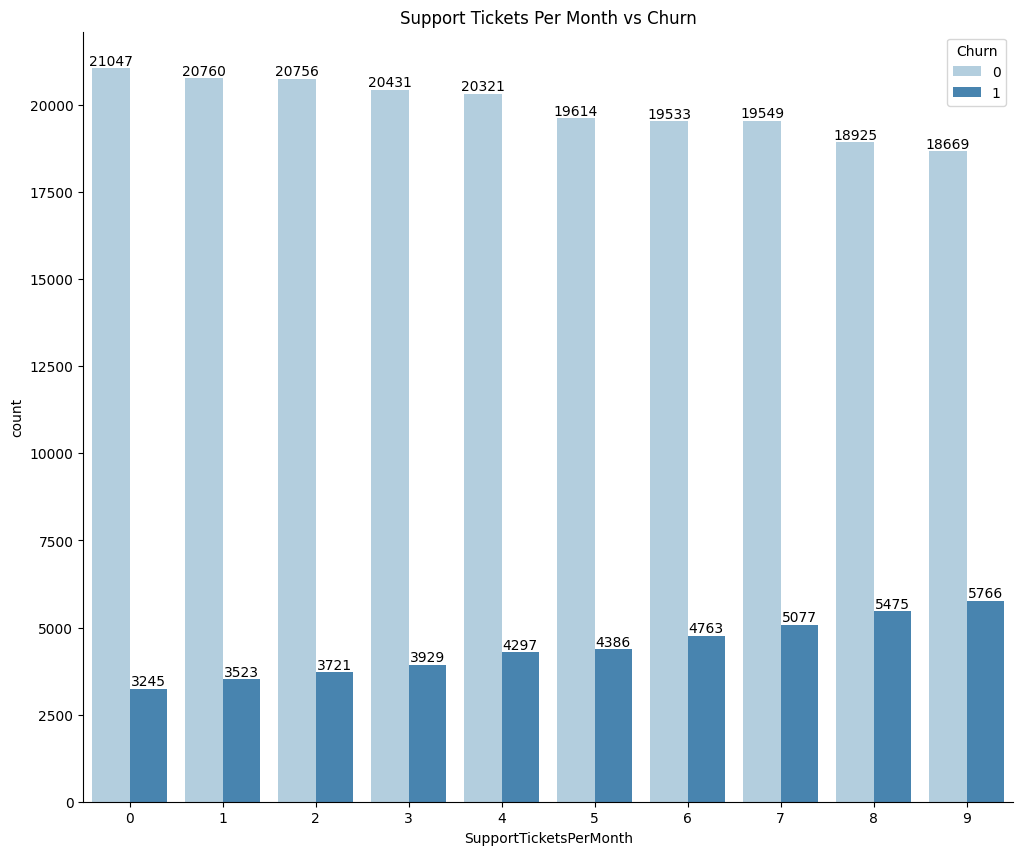

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Netflix color palette
# Create the plot
plt.figure(figsize=(12,10))
ax = sns.countplot(x='SupportTicketsPerMonth', hue='Churn', data=df, palette= 'Blues')
# Add labels to the bars
for containers in ax.containers:
    ax.bar_label(containers, label_type='edge', color='black', fontsize=10)

# Remove the top and right spines for cleaner look
sns.despine(right=True)
plt.title('Support Tickets Per Month vs Churn')

# Display the plot
plt.show()


1. **Churn Rates by Support Tickets per Month:**

 * Churn increases with the number of support tickets, with the highest churn at 5,766 for customers raising 9 tickets.
Lower churn is observed among those with fewer tickets, e.g., 3,245 churn for customers with 0 tickets.

2. **Retention Overview:**

  * Retention decreases slightly as the number of support tickets rises, starting from 21,047 for 0 tickets to 18,669 for 9 tickets.

**Insights:**

 * A higher number of support tickets correlates with increased churn, indicating possible customer dissatisfaction.
 * Reducing ticket volume through proactive support and issue resolution could improve retention.

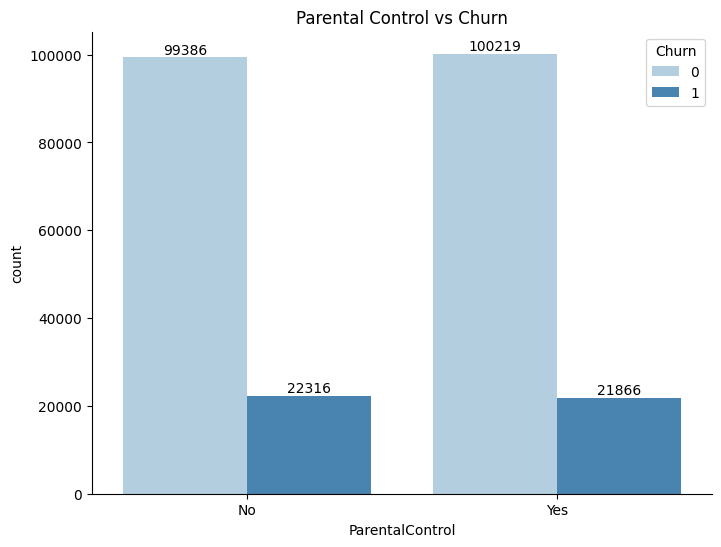

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Netflix color palette
# Create the plot
plt.figure(figsize=(8,6))
ax = sns.countplot(x='ParentalControl', hue='Churn', data=df, palette= 'Blues')
# Add labels to the bars
for containers in ax.containers:
    ax.bar_label(containers, label_type='edge', color='black', fontsize=10)

# Remove the top and right spines for cleaner look
sns.despine(right=True)
plt.title('Parental Control vs Churn')

# Display the plot
plt.show()


1. **Churn Rates by Parental Control:**

  * Customers without parental control have a churn count of 22,316.
  * Customers with parental control enabled show a slightly lower churn of 21,866.

2. **Retention Overview:**

  * Retention is consistent across both groups, with around 99,386 to 100,219 customers retained.

**Insights:**

 * Enabling parental control has a minimal impact on churn reduction.
Other engagement strategies might be needed to improve customer retention.

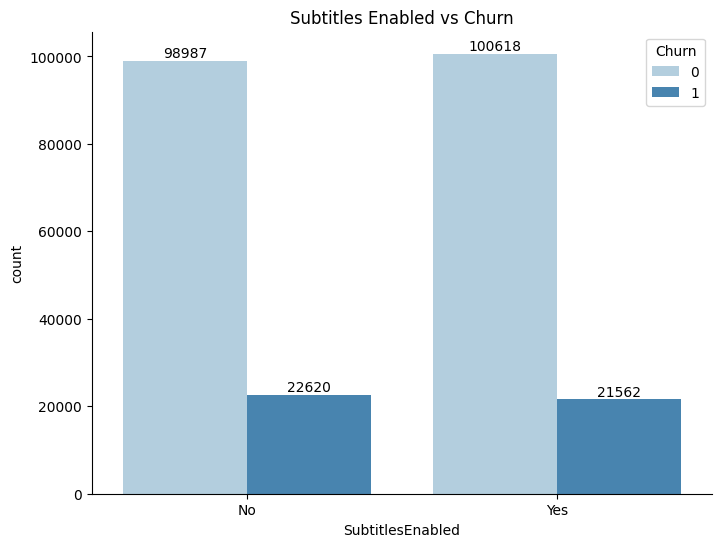

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Netflix color palette
# Create the plot
plt.figure(figsize=(8,6))
ax = sns.countplot(x='SubtitlesEnabled', hue='Churn', data=df, palette= 'Blues')
# Add labels to the bars
for containers in ax.containers:
    ax.bar_label(containers, label_type='edge', color='black', fontsize=10)

# Remove the top and right spines for cleaner look
sns.despine(right=True)
plt.title('Subtitles Enabled vs Churn')

# Display the plot
plt.show()


1. **Churn Rates by Subtitles Enabled:**

  * Customers without subtitles enabled have a churn count of 22,620.
  * Customers with subtitles enabled show slightly lower churn at 21,562.

2. **Retention Overview:**

  * Retention is consistent across both groups, with 98,987 to 100,618 customers retained.

**Insights:**
 * Enabling subtitles has a minimal effect on churn reduction.
 * Additional engagement or personalization strategies may be needed to improve retention.

In [56]:
#df.head()

In [57]:
df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [58]:
df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [59]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


# **Customer Segmentation**

## **Forming Clusters based on the viewership duration of the content.**

Text(0, 0.5, 'WCSS')

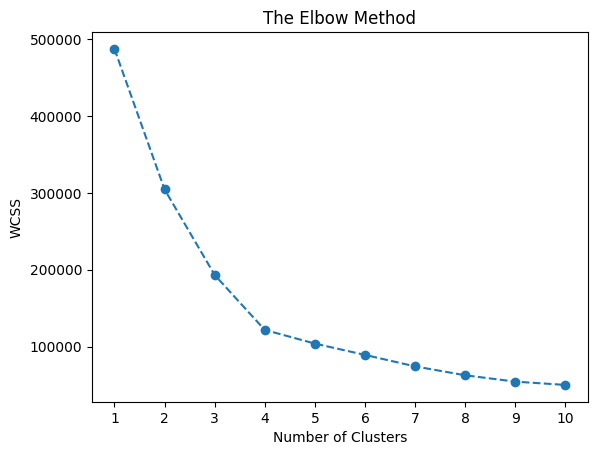

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X_train = df[['AverageViewingDuration','ViewingHoursPerWeek']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

wcss = []

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss, marker = 'o',linestyle = '--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.xticks(range(1,11,1))
plt.ylabel('WCSS')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


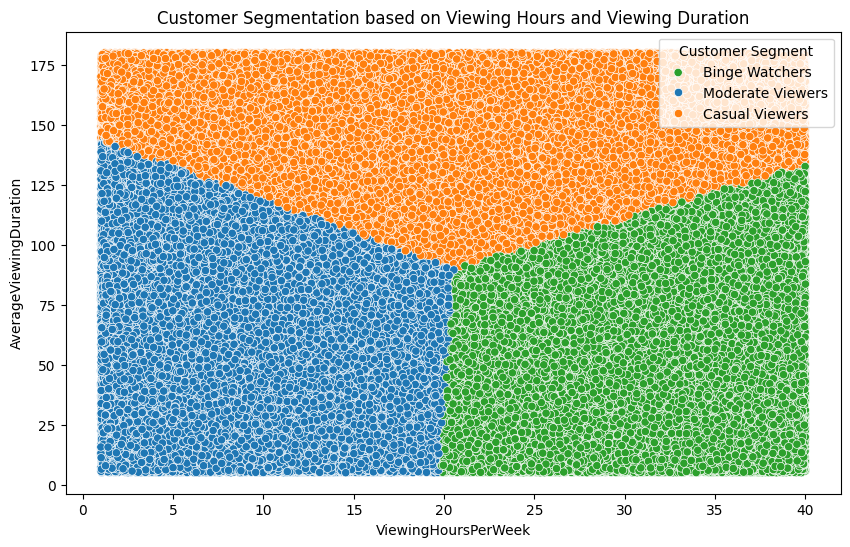

In [61]:
# Apply K-Means with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='ViewingHoursPerWeek', y='AverageViewingDuration', hue='Cluster', data=df, palette='tab10')
ax.legend(title='Customer Segment', labels=['Binge Watchers', 'Moderate Viewers', 'Casual Viewers'])

plt.title('Customer Segmentation based on Viewing Hours and Viewing Duration')
plt.show()

1. **Binge-watchers (Green Segment):**

* High Viewing Hours per Week and long session durations.
These users are deeply engaged and likely to binge-watch content frequently.
Strategy: Offer personalized recommendations for trending series, early access to new releases, and premium subscription upgrades.

2. **Casual Viewers (Blue Segment):**

* Low Viewing Hours per Week and shorter session durations.
These users engage infrequently, possibly only during free time.
Strategy: Send engagement emails, suggest short-form content (e.g., documentaries, comedy specials), or offer discounts to retain them.
Regular Viewers (Orange Segment):

3. **Moderate weekly hours and moderate session durations**
* These customers show stable but not extreme engagement.
Strategy: Promote family plans, introduce them to new genres, or offer mid-tier subscription options to encourage steady engagement.

In [62]:
# View the average metrics for each cluster
df_viewing = df.groupby('Cluster')[['ViewingHoursPerWeek', 'AverageViewingDuration']].mean()
df_viewing['Cluster'] = ['Casual Viewers','Binge Viewers','Moderate Watchers']
df_viewing.head()

,ViewingHoursPerWeek,AverageViewingDuration,Cluster
Cluster,,,
0,9.804269,62.327220,Casual Viewers
1,21.036063,145.394437,Binge Viewers
2,30.739196,58.462816,Moderate Watchers


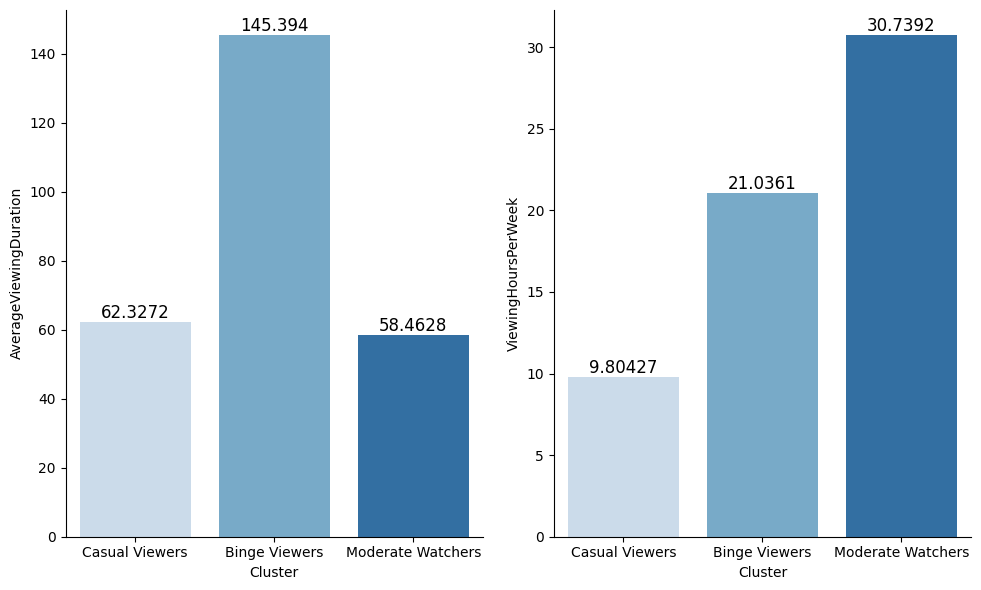

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

ax1 = sns.barplot(x='Cluster', y='AverageViewingDuration', data=df_viewing, hue= 'Cluster',palette='Blues', ax=axes[0])
for containers in ax1.containers:
  ax1.bar_label(containers, label_type='edge',color='black',fontsize=12)
#axes[0].set_title('Average Viewing Duration by Cluster Type')
sns.despine(right=True)

ax2 = sns.barplot(x='Cluster', y='ViewingHoursPerWeek', data=df_viewing,hue='Cluster',palette='Blues', ax=axes[1])
for containers in ax2.containers:
  ax2.bar_label(containers, label_type='edge', color='black', fontsize=12)
#axes[1].set_title('Average Viewing Hours Per Week by Cluster Type')
sns.despine(right=True)

plt.tight_layout()

# Display the plots
plt.show()

**Binge Viewers:**

  * Average Viewing Duration: 145.39 minutes
  * Viewing Hours Per Week: 21.04 hours
  * Engagement: High engagement with frequent binge-watching behavior.
  * Strategy: Offer personalized recommendations, early access to new content, and premium subscription upgrades.

**Casual Viewers:**

 * Average Viewing Duration: 62.33 minutes
 * Viewing Hours Per Week: 9.80 hours
 * Engagement: Low engagement, likely watching during free time.
 * Strategy: Send engagement emails, recommend short-form content, and provide discounts to encourage retention.

**Moderate Watchers:**

 * Average Viewing Duration: 58.46 minutes
 * Viewing Hours Per Week: 30.74 hours
 * Engagement: Steady engagement with moderate viewing behavior.
 * Strategy: Promote family plans, suggest new genres, or offer mid-tier subscription options to maintain steady engagement.







In [64]:
# View the average metrics for each cluster
df_charges = df.groupby('Cluster')[['MonthlyCharges', 'TotalCharges']].mean()
cluster_name = {0:'Casual Viewers',1:'Binge Viewers',2:'Moderate Watchers'}

df_charges = df_charges.rename(index=cluster_name).reset_index()
df_charges.head()

,Cluster,MonthlyCharges,TotalCharges
0,Casual Viewers,12.517846,751.706607
1,Binge Viewers,12.485593,751.643508
2,Moderate Watchers,12.469244,748.667289


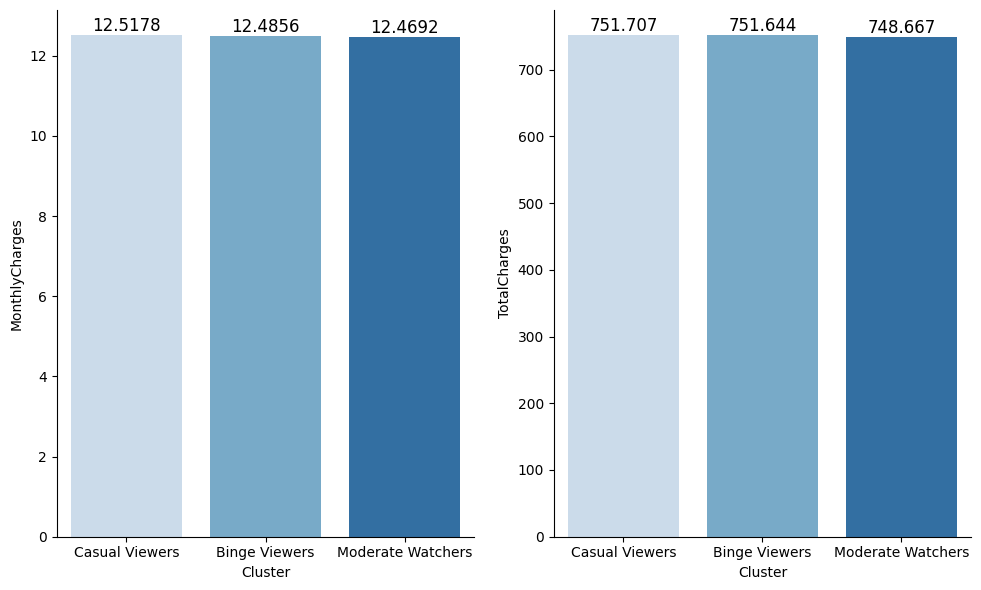

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

ax1 = sns.barplot(x='Cluster', y='MonthlyCharges',hue='Cluster',data=df_charges, palette='Blues', ax=axes[0])
for containers in ax1.containers:
  ax1.bar_label(containers, label_type='edge',color='black',fontsize=12)
sns.despine(right=True)

ax2 = sns.barplot(x='Cluster', y='TotalCharges',hue='Cluster',data=df_charges, palette='Blues', ax=axes[1])
for containers in ax2.containers:
  ax2.bar_label(containers, label_type='edge', color='black', fontsize=12)
#axes[1].set_title('Average Viewing Hours Per Week by Cluster Type')
sns.despine(right=True)

plt.tight_layout()

# Display the plots
plt.show()

In [66]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn,Cluster
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0,2
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0,2
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0,1
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0,0


**Insights:**

* Monthly and total charges are nearly identical across all clusters, indicating that viewing behavior (casual, binge, or moderate) has little influence on billing.
* Pricing adjustments may not be necessary based on viewing patterns, but other strategies like content personalization could improve retention.

In [67]:
df_content = df.groupby('Cluster')['ContentDownloadsPerMonth'].mean()
cluster_name = {0:'Casual Viewers',1:'Binge Viewers',2:'Moderate Watchers'}
df_content = df_content.rename(index= cluster_name).reset_index()
df_content.head()

,Cluster,ContentDownloadsPerMonth
0,Casual Viewers,24.517974
1,Binge Viewers,24.467343
2,Moderate Watchers,24.532546


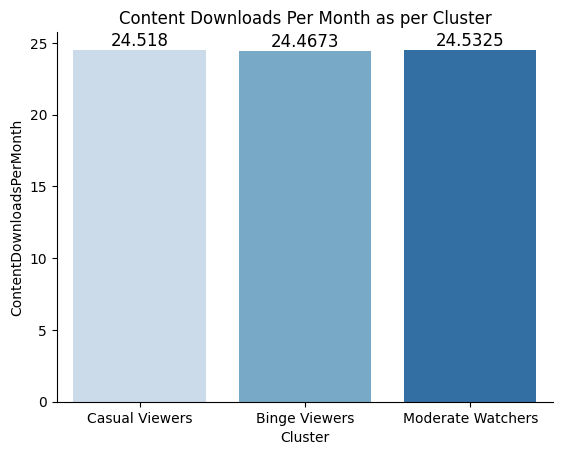

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


ax = sns.barplot(x='Cluster', y='ContentDownloadsPerMonth',hue='Cluster',data=df_content, palette='Blues')
for containers in ax.containers:
  ax.bar_label(containers, label_type='edge',color='black',fontsize=12)
plt.title('Content Downloads Per Month as per Cluster')
sns.despine(right=True)

**Insights:**
* Content download behavior is very similar across all clusters, indicating that viewing intensity (casual, binge, or moderate) does not significantly impact the number of downloads.
* Engagement strategies may need to focus more on content variety or personalized recommendations rather than just download frequency.

In [69]:
df_watchlist = df.groupby('Cluster')['WatchlistSize'].mean()
df_watchlist = df_watchlist.rename(index=cluster_name).reset_index()
df_watchlist.head()

,Cluster,WatchlistSize
0,Casual Viewers,12.021936
1,Binge Viewers,12.020783
2,Moderate Watchers,12.012269


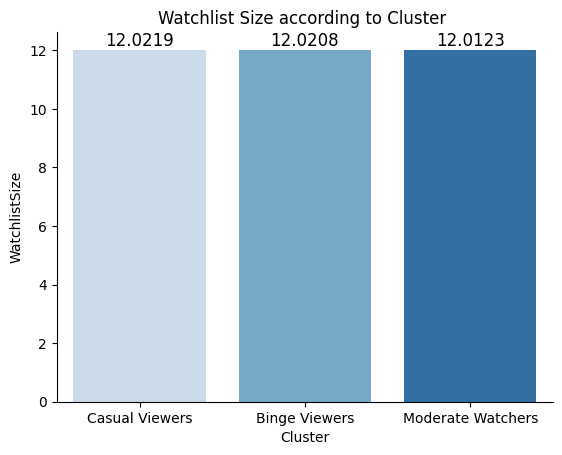

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


ax = sns.barplot(x='Cluster', y='WatchlistSize',hue='Cluster',data=df_watchlist, palette='Blues')
for containers in ax.containers:
  ax.bar_label(containers, label_type='edge',color='black',fontsize=12)
plt.title('Watchlist Size according to Cluster ')
sns.despine(right=True)


**Insights:**

* Watchlist sizes are nearly identical across all clusters, suggesting that viewing behavior (casual, binge, or moderate) has little impact on how many items users add to their watchlists.
* Personalizing watchlist recommendations or offering curated lists might encourage more active engagement with watchlists.

In [71]:
df_account = df.groupby('Cluster')['AccountAge'].mean()
df_account = df_account.rename(index=cluster_name).reset_index()
df_account.head()

,Cluster,AccountAge
0,Casual Viewers,60.085247
1,Binge Viewers,60.146168
2,Moderate Watchers,60.006763


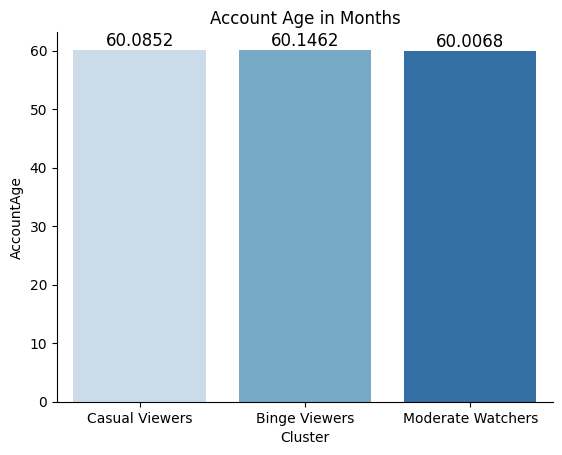

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns


ax = sns.barplot(x='Cluster', y='AccountAge',hue='Cluster',data=df_account, palette='Blues')
for containers in ax.containers:
  ax.bar_label(containers, label_type='edge',color='black',fontsize=12)
plt.title('Account Age in Months')
sns.despine(right=True)

**Insights:**

* The account age is consistent across all clusters, indicating that viewing behavior does not correlate with how long users have been subscribed.
* Engagement strategies should focus more on content consumption patterns rather than account tenure to retain users across different clusters.







In [73]:
df_support_ticket = df.groupby('Cluster')['SupportTicketsPerMonth'].mean()
df_support_ticket = df_support_ticket.rename(index=cluster_name).reset_index()
df_support_ticket.head()

,Cluster,SupportTicketsPerMonth
0,Casual Viewers,4.501112
1,Binge Viewers,4.497111
2,Moderate Watchers,4.515869


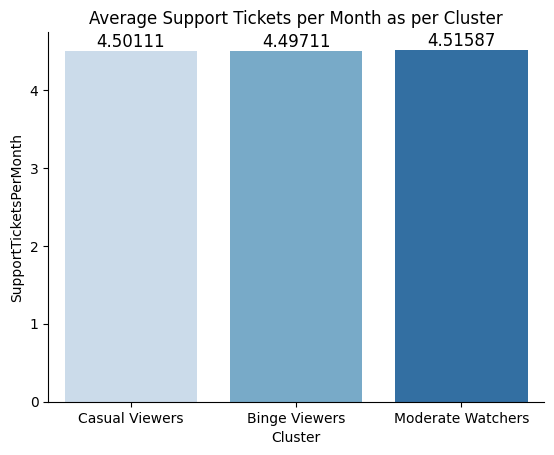

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns


ax = sns.barplot(x='Cluster', y='SupportTicketsPerMonth',hue='Cluster',data=df_support_ticket, palette='Blues')
for containers in ax.containers:
  ax.bar_label(containers, label_type='edge',color='black',fontsize=12)
plt.title('Average Support Tickets per Month as per Cluster')
sns.despine(right=True)

# **Feature Selection**

In [75]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
       'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender',
       'ParentalControl', 'SubtitlesEnabled', 'CustomerID'],
      dtype='object')

In [76]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols =df.select_dtypes(include=['object']).columns

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
encoders = {}

LabelEncoder = LabelEncoder()
for col in categorical_cols:
  df[col] = LabelEncoder.fit_transform(df[col])
  encoders[col] = LabelEncoder


df.head()


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn,Cluster
0,20,11.055215,221.104302,1,3,0,0,0,1,36.758104,...,4,2.176498,4,1,3,0,0,83175,0,2
1,57,5.175208,294.986882,0,1,1,1,0,3,32.450568,...,0,3.478632,8,1,23,0,1,190822,0,2
2,73,12.106657,883.785952,0,3,1,1,0,0,7.395160,...,3,4.238824,6,1,1,1,1,96715,0,0
3,32,7.263743,232.439774,0,2,0,2,0,3,27.960389,...,2,4.276013,2,1,24,1,1,160384,0,1
4,57,16.953078,966.325422,1,2,1,2,0,2,20.083397,...,1,3.616170,4,0,0,0,0,31073,0,0


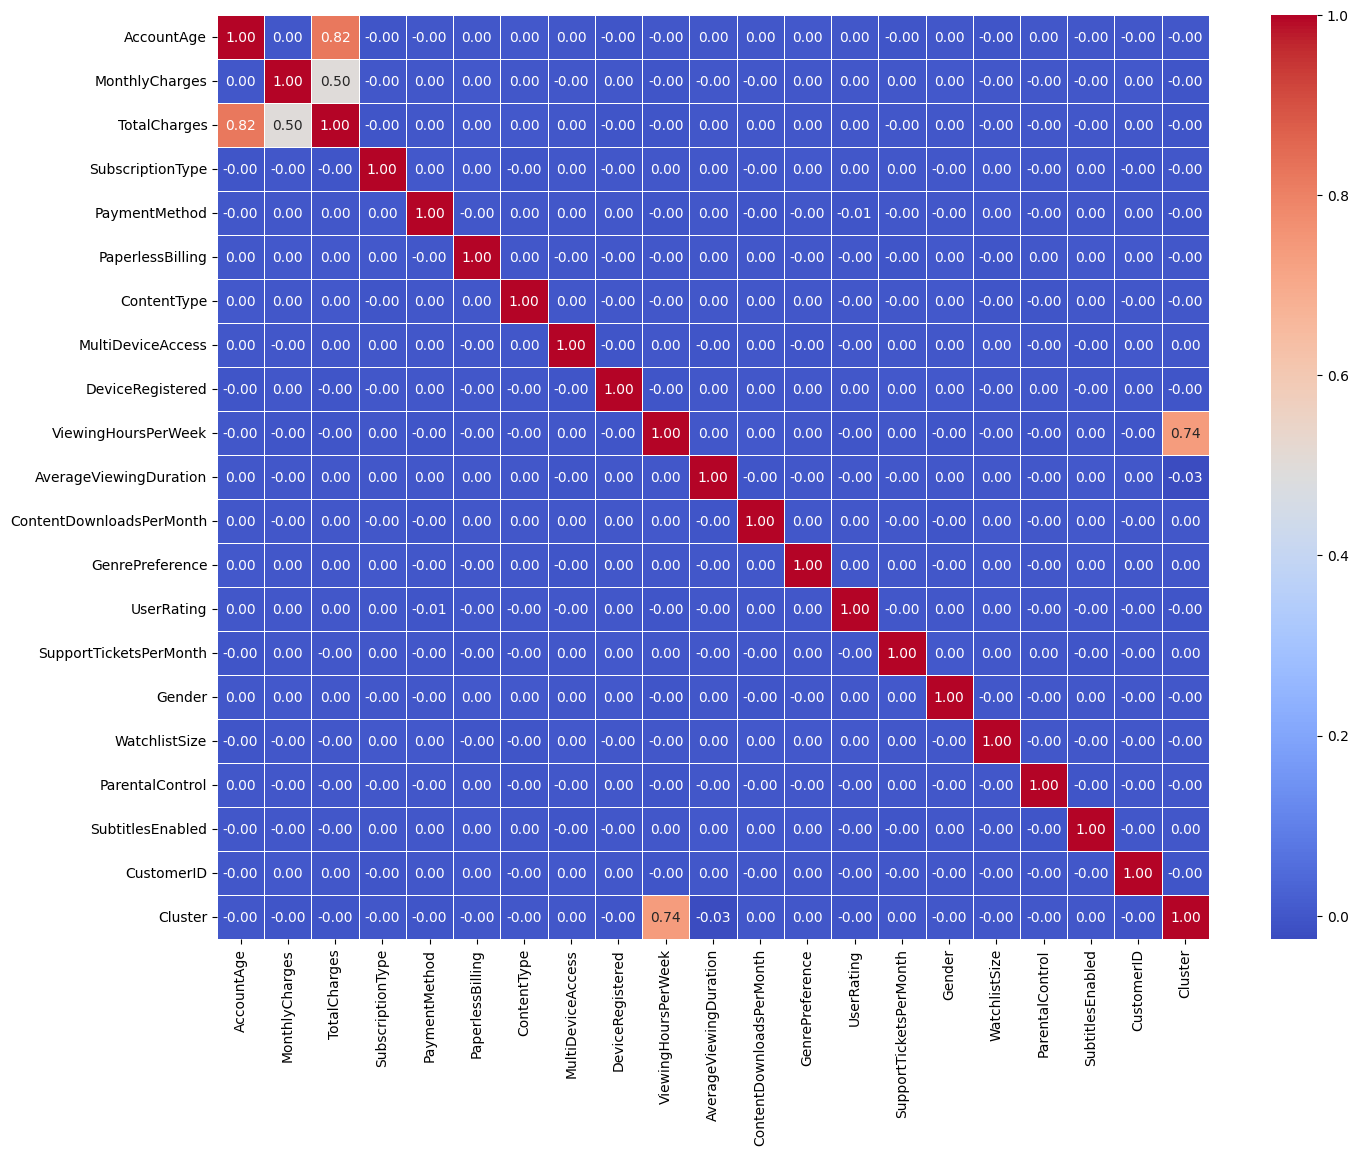

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.drop('Churn',axis=1)
correlation_matrix = df_corr.corr()

plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix,annot=True,linewidth=0.5,cmap='coolwarm', fmt='.2f')
plt.show()

* The correlation heatmap shows that most features have minimal correlation with each other, with values close to 0.
* The strongest correlation is between AccountAge and TotalCharges (0.82), which is expected, as longer account durations generally lead to higher total charges.
* Other notable correlations are between DeviceRegistered and ViewingHoursPerWeek (0.74) and AccountAge and MonthlyCharges (0.50).
* Overall, the weak correlations suggest that most features provide unique information and can be valuable independently for predictive modeling.

In [79]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn,Cluster
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,...,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,1.003569,1.500527,0.499645,0.997572,0.499420,1.499297,20.502179,...,1.996682,3.002713,4.504186,0.499850,12.018508,0.500786,0.501175,121893.000000,0.181232,0.994647
std,34.285143,4.327615,523.073273,0.817608,1.116775,0.500001,0.817392,0.500001,1.119490,11.243753,...,1.412112,1.155259,2.872548,0.500001,7.193034,0.500000,0.500000,70375.389375,0.385211,0.790673
min,1.000000,4.990062,4.991154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000065,...,0.000000,1.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.763953,...,1.000000,2.000853,2.000000,0.000000,6.000000,0.000000,0.000000,60946.500000,0.000000,0.000000
50%,60.000000,12.495555,649.878487,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,20.523116,...,2.000000,3.002261,4.000000,0.000000,12.000000,1.000000,1.000000,121893.000000,0.000000,1.000000
75%,90.000000,16.238160,1089.317362,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,30.219396,...,3.000000,4.002157,7.000000,1.000000,18.000000,1.000000,1.000000,182839.500000,0.000000,2.000000
max,119.000000,19.989957,2378.723844,2.000000,3.000000,1.000000,2.000000,1.000000,3.000000,39.999723,...,4.000000,4.999989,9.000000,1.000000,24.000000,1.000000,1.000000,243786.000000,1.000000,2.000000


## **Using LassoCV for Feature Selection**

In [80]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

X = df.drop('Churn',axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

feature_importance = pd.DataFrame({'Feature':X.columns, 'Lasso_coeff':lasso.coef_})
feature_importance = feature_importance.sort_values(by= 'Lasso_coeff',ascending=False)
feature_importance.head()

,Feature,Lasso_coeff
1,MonthlyCharges,0.057850
14,SupportTicketsPerMonth,0.032091
13,UserRating,0.008301
16,WatchlistSize,0.008126
4,PaymentMethod,0.006841


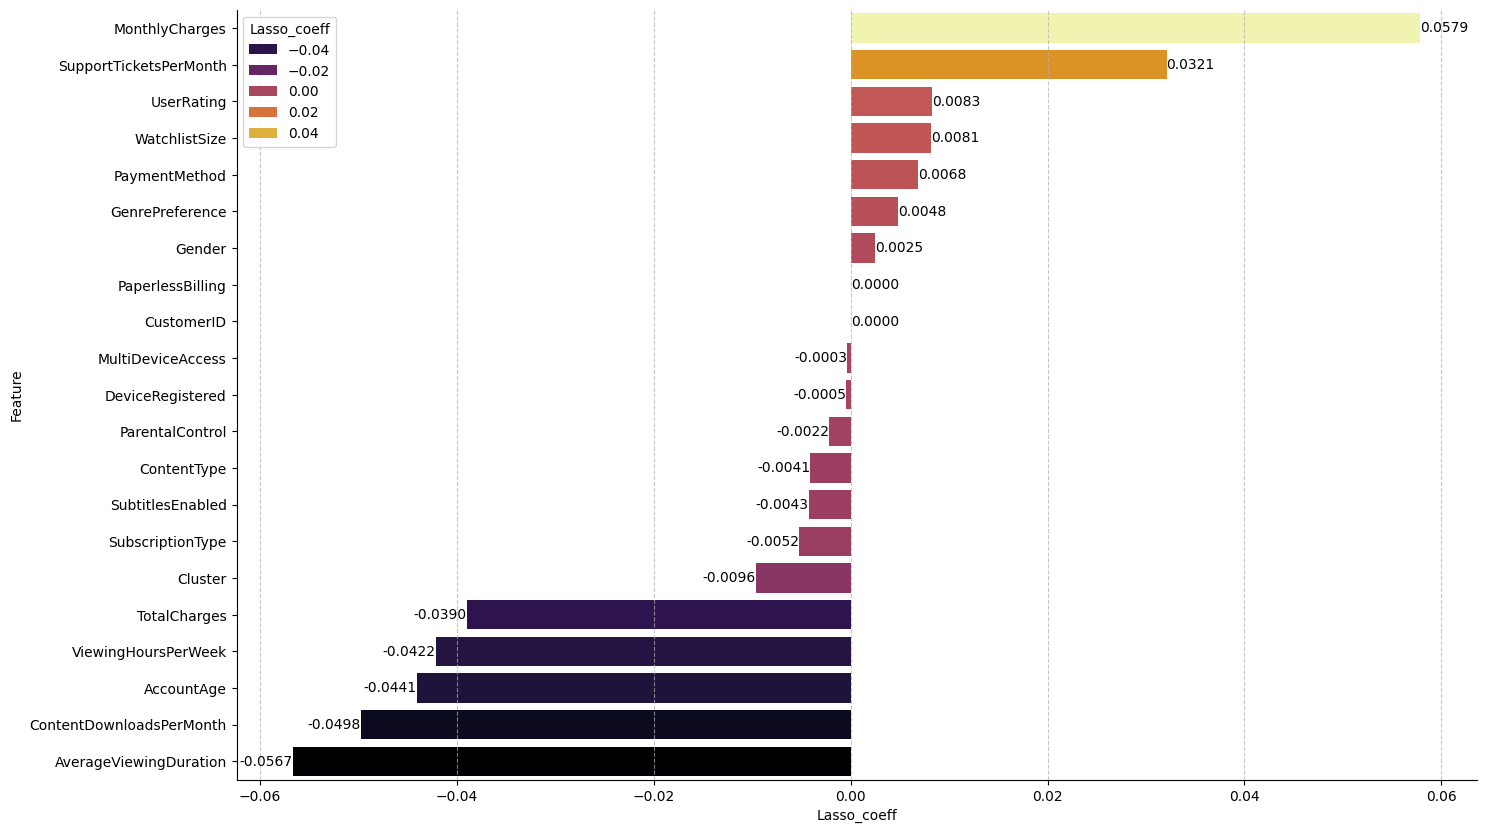

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.barplot(x='Lasso_coeff', y='Feature', data=feature_importance,hue='Lasso_coeff',palette='inferno')
for containers in ax.containers:
  ax.bar_label(containers, labels=[f'{val:.4f}' for val in containers.datavalues],label_type='edge',color='black',fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(right=True,top=True)
plt.show()

In [82]:
non_zero_features = feature_importance[feature_importance['Lasso_coeff'] != 0]

In [83]:
non_zero_features

,Feature,Lasso_coeff
1,MonthlyCharges,0.057850
14,SupportTicketsPerMonth,0.032091
13,UserRating,0.008301
16,WatchlistSize,0.008126
4,PaymentMethod,0.006841
12,GenrePreference,0.004785
15,Gender,0.002490
7,MultiDeviceAccess,-0.000341
8,DeviceRegistered,-0.000475
17,ParentalControl,-0.002183


## **Checking Class Imbalance in train set**

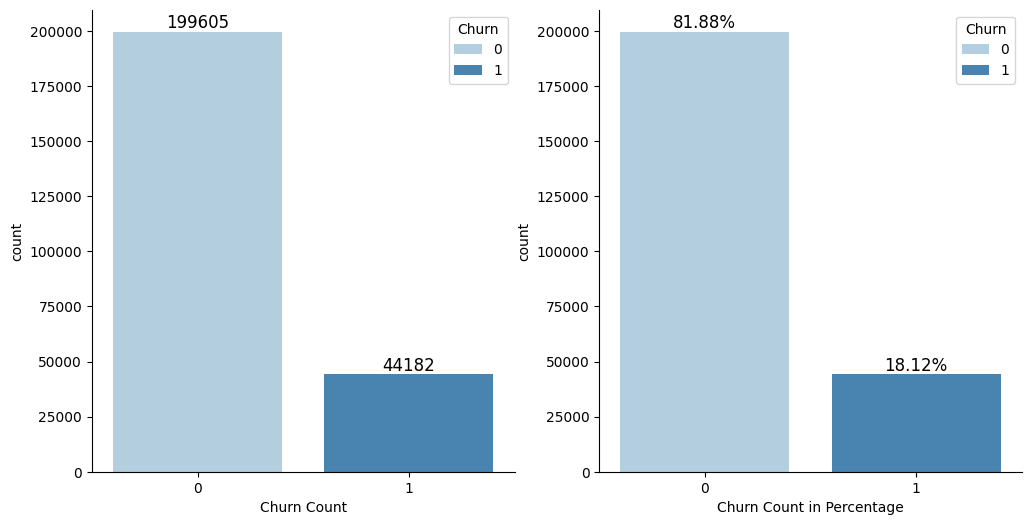

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes = plt.subplots(1,2,figsize=(12,6))
ax1 = sns.countplot(x='Churn',data=df, hue='Churn',ax =axes[0], palette='Blues')
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge',color='black',fontsize=12)
ax1.set_xlabel('Churn Count')

ax2 = sns.countplot(x='Churn',data=df, hue='Churn', ax=axes[1],palette='Blues')
for container in ax2.containers:
    labels = [f'{(v.get_height() / len(df) * 100):.2f}%' for v in container]
    ax2.bar_label(container, labels=labels, label_type='edge', color='black', fontsize=12)
ax2.set_xlabel('Churn Count in Percentage')
sns.despine(right=True)
plt.show()

### 1. It seems like there is a high imbalance in the classes in the target variable which is churn. We need to balance the class by using various technique such as SMOTE or ADASYN.
###  2. We need to check which technique better balances the class.

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.model_selection import train_test_split

X = df.drop('Churn',axis=1)
y = df['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)



### **Comparing the class balance with SMOTE and ADASYN.**

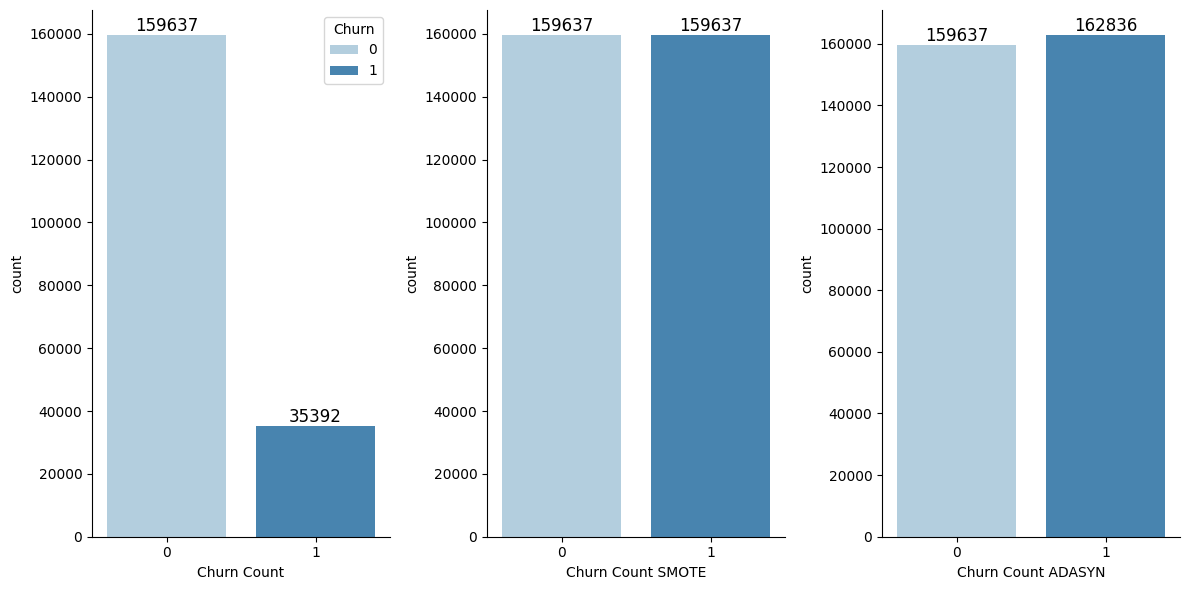

In [86]:
fig, axes = plt.subplots(1,3,figsize=(12,6))

ax1 = sns.countplot(x=y_train, ax=axes[0],hue=y_train,palette='Blues')
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge',color='black',fontsize=12)
ax1.set_xlabel('Churn Count')

ax2 = sns.countplot(x=y_train_smote, ax=axes[1],hue=y_train_smote,palette='Blues')
for container in ax2.containers:
    ax2.bar_label(container, label_type='edge',color='black',fontsize=12)
ax2.set_xlabel('Churn Count SMOTE')
ax2.legend_.remove()

ax3 = sns.countplot(x=y_train_adasyn, ax=axes[2],hue=y_train_adasyn,palette='Blues')
for container in ax3.containers:
  ax3.bar_label(container, label_type='edge',color='black',fontsize=12)
ax3.set_xlabel('Churn Count ADASYN')
ax3.legend_.remove()
sns.despine(right=True)
plt.tight_layout()
plt.show()


## **1) Logistic Regression model using Class balance with SMOTE.**

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score


pipeline = make_pipeline(StandardScaler(),
                         LogisticRegression(random_state=42))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipeline, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

pipeline.fit(X_train_smote, y_train_smote)
y_pred_logistic_smote = pipeline.predict(X_test)

accuracy_logreg_smote = accuracy_score(y_test, y_pred_logistic_smote)
print('Test set accuracy for Logistic Regression with SMOTE: ', accuracy_logreg_smote)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_logistic_smote))

Cross-validation accuracy scores: [0.77881137 0.77616475 0.78261687 0.77926552 0.78082814]
Mean cross-validation accuracy: 0.7795373293497428
Test set accuracy for Logistic Regression with SMOTE:  0.7208253004635137
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82     39968
           1       0.32      0.47      0.38      8790

    accuracy                           0.72     48758
   macro avg       0.59      0.62      0.60     48758
weighted avg       0.77      0.72      0.74     48758



## **2) Logistic Regression model with class_balance= weighted**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score


pipeline = make_pipeline(StandardScaler(),
                         LogisticRegression(class_weight= 'balanced',random_state=42))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy_logreg_classweight_balanced = accuracy_score(y_test, y_pred)
print('Test set accuracy for Logistic Regression with Class_weight = balanced: ', accuracy_logreg_classweight_balanced)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred))

Cross-validation accuracy scores: [0.67492181 0.67343486 0.67838281 0.67892119 0.67965645]
Mean cross-validation accuracy: 0.6770634243780664
Test set accuracy for Logistic Regression with Class_weight = balanced:  0.6768530292464826
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77     39968
           1       0.32      0.69      0.44      8790

    accuracy                           0.68     48758
   macro avg       0.61      0.68      0.61     48758
weighted avg       0.80      0.68      0.71     48758



## **3) Logistic Regression model with class balance using ADASYN technique**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score


pipeline = make_pipeline(StandardScaler(),
                         LogisticRegression(random_state=42))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipeline, X_train_adasyn, y_train_adasyn, cv=cv, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

pipeline.fit(X_train_adasyn, y_train_adasyn)
y_pred_logistic_adasyn = pipeline.predict(X_test)

accuracy_logreg_adasyn= accuracy_score(y_test, y_pred_logistic_adasyn)
print('Test set accuracy for Logistic Regresion with ADASYN: ', accuracy_logreg_adasyn)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_logistic_adasyn))

Cross-validation accuracy scores: [0.77607566 0.77833941 0.7795488  0.77932831 0.77970044]
Mean cross-validation accuracy: 0.7785985240057272
Test set accuracy for Logistic Regresion with ADASYN:  0.716374748759178
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82     39968
           1       0.31      0.47      0.38      8790

    accuracy                           0.72     48758
   macro avg       0.59      0.62      0.60     48758
weighted avg       0.77      0.72      0.74     48758



## **4) RandomForestClassifier with class_weight = balanced**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipeline = make_pipeline(StandardScaler(),
                         RandomForestClassifier(class_weight='balanced',random_state=42))
cv = cross_val_score(pipeline, X_train,y_train, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", cv)
print("Mean cross-validation accuracy:", np.mean(cv))

pipeline.fit(X_train, y_train)

y_pred_ef = pipeline.predict(X_test)

accuracy_rf_classweight_balanced = accuracy_score(y_test, y_pred_ef)
print('Test set accuracy for Random Forest with class_weight balanced: ', accuracy_rf_classweight_balanced)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_ef))

Cross-validation accuracy scores: [0.82071989 0.82141209 0.82056607 0.82066862 0.82092039]
Mean cross-validation accuracy: 0.8208574112720853
Test set accuracy for Random Forest with class_weight balanced:  0.8211575536322244
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90     39968
           1       0.54      0.05      0.10      8790

    accuracy                           0.82     48758
   macro avg       0.68      0.52      0.50     48758
weighted avg       0.77      0.82      0.76     48758



## **5) Random Forest with SMOTE class balance technique**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipeline = make_pipeline(StandardScaler(),
                         RandomForestClassifier(class_weight='balanced',random_state=42))
cv = cross_val_score(pipeline, X_train_smote,y_train_smote, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", cv)
print("Mean cross-validation accuracy:", np.mean(cv))

pipeline.fit(X_train_smote, y_train_smote)

y_pred_ef_smote = pipeline.predict(X_test)

accuracy_rf_smote = accuracy_score(y_test, y_pred_ef_smote)
print('Test set accuracy for Random Forest with SMOTE: ', accuracy_rf_smote)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_ef_smote))

Cross-validation accuracy scores: [0.5583901  0.86989273 0.90003915 0.89665649 0.89967739]
Mean cross-validation accuracy: 0.8249311711765376
Test set accuracy for Random Forest with SMOTE:  0.7744985438287051
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86     39968
           1       0.35      0.29      0.32      8790

    accuracy                           0.77     48758
   macro avg       0.60      0.59      0.59     48758
weighted avg       0.76      0.77      0.77     48758



## **6) Random Forest with ADASYN class balance technique**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipeline = make_pipeline(StandardScaler(),
                         RandomForestClassifier(class_weight='balanced',random_state=42))
cv = cross_val_score(pipeline, X_train_adasyn,y_train_adasyn, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", cv)
print("Mean cross-validation accuracy:", np.mean(cv))

pipeline.fit(X_train_adasyn, y_train_adasyn)

y_pred_rf_adasyn = pipeline.predict(X_test)

accuracy_rf_adasyn = accuracy_score(y_test, y_pred_rf_adasyn)
print('Test set accuracy for Random Forest with ADASYN: ', accuracy_rf_adasyn)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_rf_adasyn))

Cross-validation accuracy scores: [0.55173269 0.86828436 0.89211567 0.88876485 0.88887338]
Mean cross-validation accuracy: 0.8179541906759591
Test set accuracy:  0.7727552401657164
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86     39968
           1       0.35      0.30      0.32      8790

    accuracy                           0.77     48758
   macro avg       0.60      0.59      0.59     48758
weighted avg       0.76      0.77      0.77     48758



## **7) KNN Classifier with SMOTE**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

pipeline = make_pipeline(StandardScaler(),
                         KNeighborsClassifier(n_neighbors=5))
cv = cross_val_score(pipeline, X_train_smote,y_train_smote, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", cv)
print("Mean cross-validation accuracy:", np.mean(cv))

pipeline.fit(X_train_smote, y_train_smote)

y_pred_knn_smote = pipeline.predict(X_test)

accuracy_knn_smote = accuracy_score(y_test, y_pred_knn_smote)
print('Test set accuracy for KNN with SMOTE: ', accuracy_knn_smote)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_knn_smote))

Cross-validation accuracy scores: [0.65027014 0.80668703 0.82416412 0.82298959 0.82134244]
Mean cross-validation accuracy: 0.7850906627278599
Test set accuracy:  0.6638295254112145
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.86      0.71      0.78     39968
           1       0.26      0.46      0.33      8790

    accuracy                           0.66     48758
   macro avg       0.56      0.58      0.55     48758
weighted avg       0.75      0.66      0.70     48758



## **8) KNN Classifier with ADASYN**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

pipeline = make_pipeline(StandardScaler(),
                         KNeighborsClassifier(n_neighbors=5))
cv = cross_val_score(pipeline, X_train_adasyn,y_train_adasyn, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", cv)
print("Mean cross-validation accuracy:", np.mean(cv))

pipeline.fit(X_train_adasyn, y_train_adasyn)

y_pred_knn_adasyn = pipeline.predict(X_test)

accuracy_knn_adasyn = accuracy_score(y_test, y_pred_knn_adasyn)
print('Test set accuracy for KNN with ADASYN: ', accuracy_knn_adasyn)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_knn_adasyn))

Cross-validation accuracy scores: [0.65274828 0.80435693 0.81553609 0.81481998 0.81295935]
Mean cross-validation accuracy: 0.7800841236664185
Test set accuracy:  0.6582304442347923
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77     39968
           1       0.25      0.46      0.33      8790

    accuracy                           0.66     48758
   macro avg       0.56      0.58      0.55     48758
weighted avg       0.75      0.66      0.69     48758



## **9) KNNClassifier without class balance**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

pipeline = make_pipeline(StandardScaler(),
                         KNeighborsClassifier(n_neighbors=5))
cv = cross_val_score(pipeline, X_train,y_train, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", cv)
print("Mean cross-validation accuracy:", np.mean(cv))

pipeline.fit(X_train, y_train)

y_pred_knn = pipeline.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Test set accuracy for KNN without class balance: ', accuracy)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_knn))

Cross-validation accuracy scores: [0.79913347 0.79910783 0.79946675 0.7970825  0.79933342]
Mean cross-validation accuracy: 0.798824792767363
Test set accuracy:  0.80009434349235
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     39968
           1       0.36      0.14      0.20      8790

    accuracy                           0.80     48758
   macro avg       0.60      0.54      0.54     48758
weighted avg       0.75      0.80      0.76     48758



## **10) XGBoost with SMOTE for class balance.**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipeline = make_pipeline(StandardScaler(),
                         XGBClassifier(objective= 'binary:logistic',
                                       eval_metric='logloss',
                                       use_label_encoder=False,
                                       n_estimators=100,
                                       learning_rate=0.1,
                                       max_depth=5,
                                       random_state=42
                         ))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipeline, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

pipeline.fit(X_train_smote, y_train_smote)
y_pred_xgb_smote = pipeline.predict(X_test)

accuracy_xgboost_smote = accuracy_score(y_test, y_pred_xgb_smote)
print('Test set accuracy for XGBoost with SMOTE: ', accuracy_xgboost_smote)

classification_report = classification_report(y_test, y_pred_xgb_smote)
print("Classification Report on Test Set:\n", classification_report)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:15:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:15:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:15:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:15:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:15:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation accuracy scores: [0.81810352 0.81586407 0.82045259 0.81841673 0.81983901]
Mean cross-validation accuracy: 0.8185351807658219


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:15:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test set accuracy:  0.7511998031092334
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85     39968
           1       0.33      0.38      0.35      8790

    accuracy                           0.75     48758
   macro avg       0.60      0.60      0.60     48758
weighted avg       0.76      0.75      0.76     48758



## **11) XGBoost with ADASYN for class balance**.

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipeline = make_pipeline(StandardScaler(),
                         XGBClassifier(objective= 'binary:logistic',
                                       eval_metric='logloss',
                                       use_label_encoder=False,
                                       n_estimators=100,
                                       learning_rate=0.1,
                                       max_depth=5,
                                       random_state=42
                         ))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipeline, X_train_adasyn, y_train_adasyn, cv=cv, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

pipeline.fit(X_train_adasyn, y_train_adasyn)
y_pred_xgb_adasyn = pipeline.predict(X_test)

accuracy_xgboost_adasyn = accuracy_score(y_test, y_pred_xgb_adasyn)
print('Test set accuracy for XGBoost with ADASYN: ', accuracy_xgboost_adasyn)

classification_report = classification_report(y_test, y_pred_xgb_adasyn)
print("Classification Report on Test Set:\n", classification_report)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:17:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:17:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:17:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:18:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:18:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation accuracy scores: [0.81866811 0.81902473 0.81886968 0.81858778 0.82007629]
Mean cross-validation accuracy: 0.8190453171999745


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:18:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test set accuracy:  0.7483694983387341
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84     39968
           1       0.33      0.38      0.35      8790

    accuracy                           0.75     48758
   macro avg       0.59      0.60      0.60     48758
weighted avg       0.76      0.75      0.75     48758



## **12)XGBoost technique with scale_weight.**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

Churn_no = sum(y_train == 0)
Churn_yes = sum(y_train == 1)

scale_weight = Churn_no /  Churn_yes

pipeline = make_pipeline(StandardScaler(),
                         XGBClassifier(objective= 'binary:logistic',
                                       eval_metric='logloss',
                                       use_label_encoder=False,
                                       scale_pos_weight=scale_weight,
                                       n_estimators=100,
                                       learning_rate=0.1,
                                       max_depth=5,
                                       random_state=42
                         ))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')


print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

pipeline.fit(X_train, y_train)
y_pred_xgb = pipeline.predict(X_test)

accuracy_xgboost_scale_weight = accuracy_score(y_test, y_pred_xgb)
print('Test set accuracy for XGBoost with scale_weight: ', accuracy_xgboost_scale_weight)

classification_report = classification_report(y_test, y_pred_xgb)
print("Classification Report on Test Set:\n", classification_report)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:24:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:24:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:24:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:24:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:24:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation accuracy scores: [0.67528073 0.67587038 0.67702405 0.67956212 0.68014357]
Mean cross-validation accuracy: 0.6775761685052112


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:24:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test set accuracy for XGBoost with scale_weight:  0.6788014274580582
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.91      0.68      0.78     39968
           1       0.32      0.69      0.44      8790

    accuracy                           0.68     48758
   macro avg       0.61      0.68      0.61     48758
weighted avg       0.80      0.68      0.71     48758



### **Based on the model summary of all the above models, the best models that performed well on the overall accuracy alongwith a good recall score for Class 1 are as below.**

### **2) Logistic Regression with Class_weight = balanced**
### **12)XGBoost technique with scale_weight.**

## **Hyperparameter Tuning**

## **Model 13) Logistic Regression with Class_weight=balanced**

### **Explanation of Hyperparameters for GridSearchCV**
### a) C: Regularization Strength
####  1.We explored values from 0.001 to 100 to control the trade-off between model complexity and overfitting. Lower values (e.g., 0.001, 0.01) enforce stronger regularization to prevent overfitting. Higher values (e.g., 10, 100) allow the model to fit the training data more closely, useful if underfitting is observed.

### b) solver: Optimization Algorithms
#### We used lbfgs and newton-cg, which are efficient for large datasets and support L2 regularization. Both solvers handle binary classification problems well, ensuring faster convergence and better scalability compared to other solvers.

### c) Class Weight: Balanced
#### Since the target classes are imbalanced (0 and 1), setting class_weight='balanced' adjusts the model to give equal importance to both classes, improving recall for the minority class.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import time

# Start the timer
start_time = time.time()

# Define the pipeline with standard scaling and logistic regression
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'logisticregression__solver': ['lbfgs', 'newton-cg']  # Suitable solvers for large datasets
}

# Set up stratified K-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='f1',
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Print progress messages
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from the search
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# End the timer and calculate the execution time
end_time = time.time()
execution_time = end_time - start_time

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Test set accuracy:', accuracy)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred))
print('Execution Time:', execution_time, 'seconds')


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Test set accuracy: 0.6777964641699824
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77     39968
           1       0.32      0.69      0.44      8790

    accuracy                           0.68     48758
   macro avg       0.61      0.68      0.61     48758
weighted avg       0.80      0.68      0.71     48758

Execution Time: 37.561296224594116 seconds


### With hyperparameter tuning using GridSearch CV it was found that there were not much changes in the model performance , hence hyperparameter tuning does not yield any better result for our Logistic Regression model with Class_weight = balanced.

## **14) XGBoost model with scale_weight alongwith tuned Hyperparamaeters - Best Model**

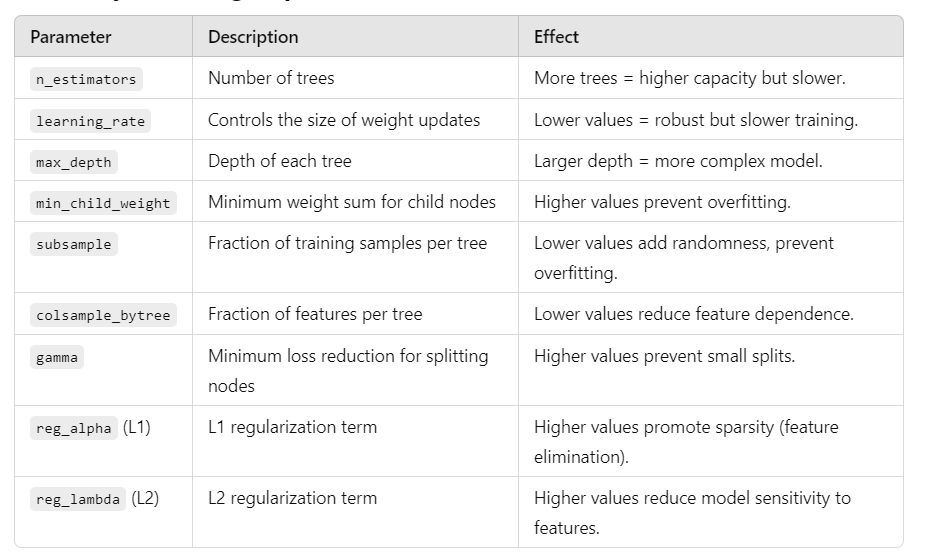

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import time

# Calculate scale_pos_weight
Churn_no = sum(y_train == 0)
Churn_yes = sum(y_train == 1)
scale_weight = Churn_no / Churn_yes

# Define the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    XGBClassifier(objective='binary:logistic',
                  eval_metric='logloss',
                  use_label_encoder=False,
                  scale_pos_weight=scale_weight,
                  random_state=42)
)

# Define the parameter grid for GridSearchCV
param_grid = {
    'xgbclassifier__n_estimators': [50, 100, 200],  # Number of boosting rounds
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'xgbclassifier__max_depth': [3, 5, 7],  # Maximum tree depth for base learners
    'xgbclassifier__subsample': [0.7, 0.8, 1.0],  # Subsample ratio of training instances
    'xgbclassifier__colsample_bytree': [0.7, 0.8, 1.0]  # Subsample ratio of columns
}

# Set up Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',  # You can change this to 'f1' if recall for the minority class is important
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Print progress messages
)

# Start the timer
start_time = time.time()

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# End the timer and print execution time
end_time = time.time()
execution_time = end_time - start_time
print(f"GridSearchCV execution time: {execution_time:.2f} seconds")

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_xgb)
print('Test set accuracy for XGBoost: ', accuracy)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_xgb))

# Optional: Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
print('Confusion Matrix:\n', cm)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV execution time: 3137.63 seconds
Best parameters found:  {'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__max_depth': 7, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__subsample': 1.0}
Best cross-validation accuracy:  0.7117454494739068
Test set accuracy for XGBoost:  0.7058944173263875
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80     39968
           1       0.33      0.61      0.43      8790

    accuracy                           0.71     48758
   macro avg       0.61      0.67      0.61     48758
weighted avg       0.79      0.71      0.73     48758

Confusion Matrix:
 [[29065 10903]
 [ 3437  5353]]


### 1) Performing Hyperparameter tuning on XGBoost model gave us an increment of 3% in the accuracy although the recall for class 1 has reduced by 0.08%.

In [88]:
df_model = pd.read_csv('/content/Model_Performance_Comparison.csv')
df_model

,Model,Test Set Accuracy,Precision (class 0),Recall (class 0),F1-score (class 0),Precision (class 1),Recall (class 1),F1-score (class 1)
0,Logistic Regression with SMOTE,72.08%,0.87,0.78,0.82,0.32,0.47,0.38
1,Logistic Regression with Class Weight Balanced,67.68%,0.91,0.67,0.77,0.32,0.69,0.44
2,Logistic Regression with ADASYN,71.64%,0.87,0.77,0.82,0.31,0.47,0.38
3,Random Forest with Class Weight Balanced,82.12%,0.83,0.99,0.90,0.54,0.05,0.10
4,Random Forest with SMOTE,77.45%,0.85,0.88,0.86,0.35,0.29,0.32
5,Random Forest with ADASYN,77.28%,0.85,0.88,0.86,0.35,0.30,0.32
6,KNN Classifier with SMOTE,66.38%,0.86,0.71,0.78,0.26,0.46,0.33
7,KNN Classifier with ADASYN,80%,0.86,0.70,0.77,0.36,0.14,0.20
8,KNN Classifier without Class Balance,75.12%,0.83,0.95,0.89,0.33,0.38,0.35
9,XGBoost with SMOTE,75.12%,0.86,0.83,0.85,0.33,0.38,0.35


## **Summary**
### 1) In today's highly competitive streaming industry, reducing customer churn is essential for profitability, especially given the high costs associated with customer acquisition. This analysis focused on identifying the main factors driving customer churn and segmenting customers based on their engagement patterns to improve retention strategies.
### 2) Using data on subscription plans, payment methods, device registrations, and content preferences, several machine learning models were evaluated for their predictive accuracy.
### 3)The best performing models were Logistic Regression with balanced class weight (accuracy: 67.68%, Class 1 recall: 0.69) and XGBoost with scale weight after hyperparameter tuning (accuracy: 70.58%, Class 1 recall: 061) for class balance, although the latter experienced a minor decrease in recall following hyperparameter tuning.
### 4)Key insights highlighted that churn rates were higher among customers on basic or standard subscription plans and those using electronic payment methods, likely due to fewer features or payment-related frustrations.
### 5)Device type and access to multi-device usage showed minimal impact on churn, suggesting that other personalized engagement features might be more e􀆯ective in retaining customers. Furthermore, customer segmentation identified three main groups—binge-watchers, casual viewers, and moderate watchers—each with unique engagement behaviors and needs. These insights indicate that targeted strategies based on both churn drivers and customer segments could be effective in improving overall retention.

## **Recommendation**
### **1) Revenue Retention and CLV Enhancement**: Implement targeted retention strategies for high-risk customers using insights from churn prediction, such as o􀆯ering discounts, personalized content, or loyalty rewards. This approach not only reduces revenue loss but also enhances customer lifetime value by encouraging longer-term engagement.
### **2) Subscription Plan Optimization:** Address higher churn rates among Basic and Standard plan users by promoting upsells to Premium or introducing mid-tier plans with additional features that align with their preferences. This can be achieved through personalized campaigns that highlight the benefits of upgrading to improve satisfaction and reduce churn.
### **3) Payment Method Optimization:** Given the increased churn among electronic check users, incentivize the adoption of automated, hassle-free payment methods like credit cards or bank transfers. Promotions or small discounts for auto-payment setups can help retain customers and reduce churn caused by payment-related issues.
### **4) Segment-Specific Retention Strategies:**
### * **Binge-watchers:** Keep these highly engaged customers satisfied by o􀆯ering early access to new releases, premium recommendations, and subscription upgrades. Regularly updating content offerings with trending shows or exclusive access will strengthen their loyalty.
### * **Casual Viewers:** Engage these infrequent users with targeted emails promoting shortform content (e.g., documentaries, specials) and offer incentives like time-limited discounts to increase their usage frequency.
### * **Moderate Watchers:** Promote family plans, diverse genre recommendations, or midtier packages to cater to these users’ steady engagement levels. Content exploration incentives can increase satisfaction and retention in this segment.
### 5. **Enhanced Customer Support:** Improve support experiences for users who frequently raise tickets by offering quicker response times or proactive outreach for recurring issues. Providing quality support can reduce dissatisfaction, lower churn risk, and build customer trust.
### 6. **Optimized Content and Marketing Strategy:** Leverage customer segmentation insights to deliver tailored content and marketing messages that match each segment's preferences, improving engagement and satisfaction. Personalized content recommendations and targeted campaigns will drive a more immersive, satisfying user experience.